### Τεχνολογίες Κινητού Υπολογισμού με Μηχανική Μάθηση
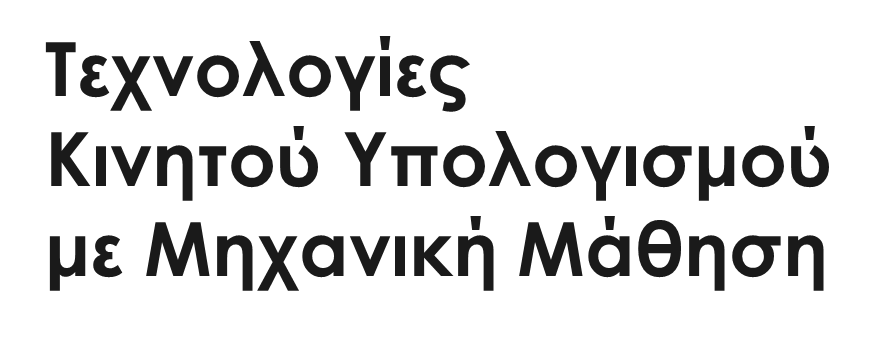
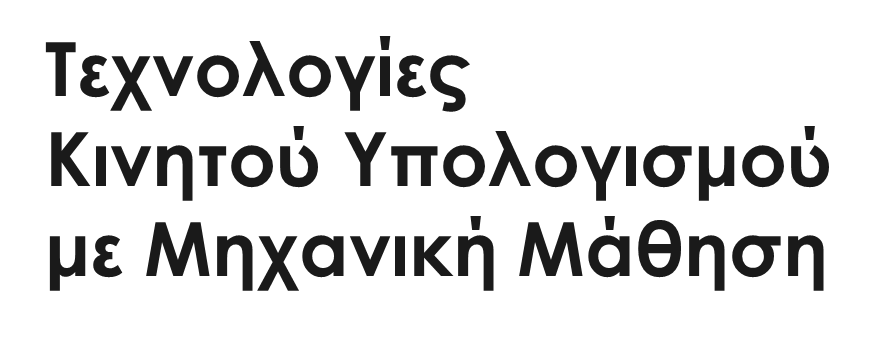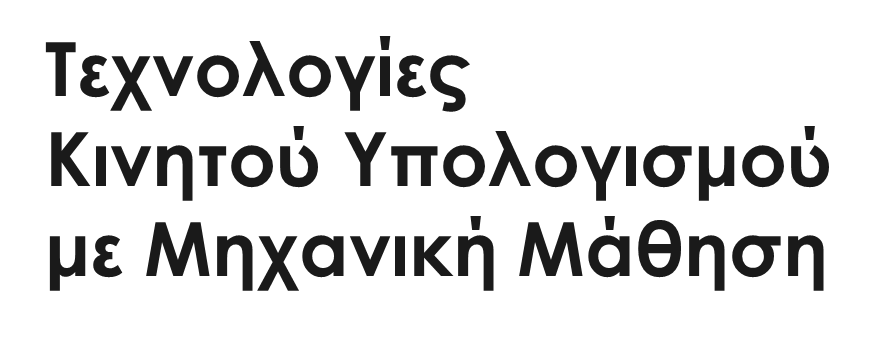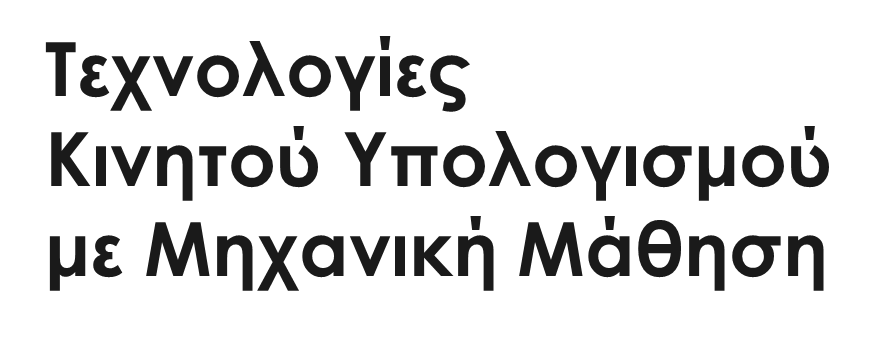
#### 1η Εργαστηριακή Άσκηση 

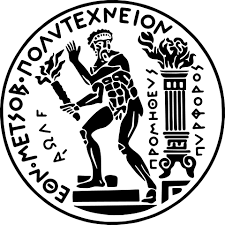

Σχολή Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών

Εργαστήρι Ευφυών Επικοινωνιών και Δικτύων Ευρείας Ζώνης

Εθνικό Μετσόβιο Πολυτεχνείο

9ο εξάμηνο

Ακ. Έτος 2024-2025



 `⚠️  Παρακαλείστε να μην δημοσιεύσετε τις απαντήσεις και υλοποιήσεις των εργαστηριακών ασκήσεων στο διαδίκτυο. Ο λόγος είναι η πιθανή επανάληψη των συγκεκριμένων ασκήσεων σε επόμενα ακαδημαικά έτη.`

 `⚠️  Τα χαρακτηριστικά του συνόλου δεδομένων που σας δόθηκαν μπορούν φυσικά να τροποποιηθούν με χρήση στατιστικών μεθόφων ή ακόμα και να παραλειφθούν. Ωστόσο, σε καμία περίπτωση, το σύνολο δεδομένων δεν πρέπει να εμπλουτισθεί με επιπλέον εγγραφές. Πιθανές τέτοιες ενέργειες θα κοστίσουν στην τελική βαθμολόγηση της εργασίας σας.`

Ονοματεπώνυμο φοιτητή: Μπράκης Νικόλαος

Α.Μ.: 03118439

### 1. Εισαγωγή συνόλου δεδομένων

Η κάθε ομάδα μπορεί να κατεβάσει το προσωποποιημένο σύνολο δεδομένων για το training-(validation)-test από [εδώ](https://drive.google.com/drive/folders/1lO6elfOldaqSw7k-UWvZBZTWKdmisp5b?usp=sharing).



In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

1.α. Φορτώστε το σύνολο δεδομένων στο notebook σας.

In [2]:
#Importing Data On Kaggle:
df_data = pd.read_csv("/kaggle/input/throughput-data/dataset_new.csv")

1.β. Τυπώστε τις πρώτες 5 ή 10 γραμμές του dataset για να δείτε ότι έχει φορτωθεί όπως πρέπει

In [3]:
df_data.head(10)

,X,Y,base_station_user,sector_of_BS_user,sector_user,ModulationType,Power_W_,BS_UEDistance_km_,BS_UEAngle_degrees_,Throughput_Mbps_
0,-1538.494704,1229.952836,10,1,28,QPSK,0.176421,2.175760,195.063406,379.315339
1,-1392.160776,1583.572523,9,1,25,16-QAM,0.053331,1.968813,326.605415,299.266046
2,34.900399,-1440.542036,1,1,1,QPSK,0.000312,0.049357,347.032825,1161.318447
3,-1482.404758,1613.021019,9,1,25,16-QAM,0.125557,2.096437,152.344674,814.071594
4,1451.921185,521.828373,12,2,35,64-QAM,0.017777,2.053327,314.814695,1192.715985
5,616.326717,-1554.882990,7,1,19,64-QAM,0.013619,0.871618,192.214154,628.549844
6,159.214320,-852.220482,1,3,3,16-QAM,0.005459,0.225163,215.237927,241.695996
7,-981.174170,189.916792,14,2,41,64-QAM,0.219217,1.387590,263.987159,1492.662793
8,1034.613979,1784.382421,17,3,51,QPSK,0.215195,1.463165,284.441736,176.481929
9,-1046.819888,1813.045696,16,2,47,16-QAM,0.173601,1.480427,0.643953,317.376338


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    10075 non-null  float64
 1   Y                    10075 non-null  float64
 2   base_station_user    10075 non-null  int64  
 3   sector_of_BS_user    10075 non-null  int64  
 4   sector_user          10075 non-null  int64  
 5   ModulationType       10075 non-null  object 
 6   Power_W_             10075 non-null  float64
 7   BS_UEDistance_km_    10075 non-null  float64
 8   BS_UEAngle_degrees_  10075 non-null  float64
 9   Throughput_Mbps_     10075 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 787.2+ KB


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Με βάση το notebook της παρουσίασης της 2ης εργαστηριακής άσκησης δημιουργήστε code cells με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων. Συνίσταται η χρήση text cells για επεξήγηση των αποτελεσμάτων της EDA. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων (είναι ισοροππημένο το σύνολο δεδομένων;),

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [5]:
n_samples = len(df_data)
print(f"Number of samples: {n_samples}")
n_features = df_data.shape[1]
print(f"Number of features: {n_features}")


Number of samples: 10075
Number of features: 10


Low Ratio: 12.89%
High Ratio: 87.11%


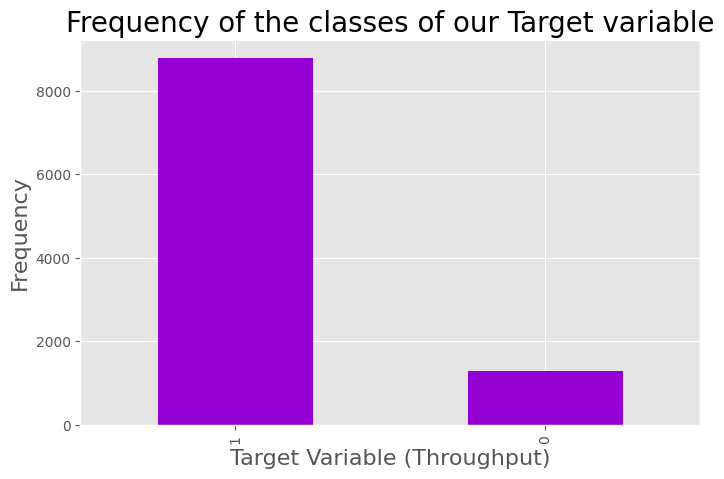

In [6]:
df_data['Throughput_cat'] = df_data['Throughput_Mbps_'].apply(lambda x: 0 if x < 300 else 1)

plt.style.use("ggplot")
df_data['Throughput_cat'].value_counts().plot(kind="bar", figsize = (8,5), color = "darkviolet")
plt.title("Frequency of the classes of our Target variable", size=20)
plt.xlabel("Target Variable (Throughput)", size = 16)
plt.ylabel("Frequency", size = 16)

category_counts = df_data['Throughput_cat'].value_counts()
low_ratio = category_counts[0] / n_samples
high_ratio = category_counts[1] / n_samples
print(f"Low Ratio: {low_ratio:.2%}")
print(f"High Ratio: {high_ratio:.2%}")

Για να αποφανθούμε αν το σύνολο δεδομένων είναι ισορροπημένο, θέλουμε να δούμε την κατανομή των κλάσσεων του χαρακτηριστικού που θέλουμε να προβλέψουμε το οποίιο είναι το throughput. Έτσι δημιουργούμε δύο κλάσσεις, μία 'Low' και μία 'High' για τιμές <300 και >300 αντίστοιχα. Όπως βλέπουμε το dataset δεν είναι ισορροπημένο. Το ποσοστό υψηλών τιμών throughput κυριαρχεί των χαμηλών τιμών με 87.11% έναντι του συνόλου τιμών. 

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    10075 non-null  float64
 1   Y                    10075 non-null  float64
 2   base_station_user    10075 non-null  int64  
 3   sector_of_BS_user    10075 non-null  int64  
 4   sector_user          10075 non-null  int64  
 5   ModulationType       10075 non-null  object 
 6   Power_W_             10075 non-null  float64
 7   BS_UEDistance_km_    10075 non-null  float64
 8   BS_UEAngle_degrees_  10075 non-null  float64
 9   Throughput_Mbps_     10075 non-null  float64
 10  Throughput_cat       10075 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 865.9+ KB


In [8]:
# labels
df_data.columns

Index(['X', 'Y', 'base_station_user', 'sector_of_BS_user', 'sector_user',
       'ModulationType', 'Power_W_', 'BS_UEDistance_km_',
       'BS_UEAngle_degrees_', 'Throughput_Mbps_', 'Throughput_cat'],
      dtype='object')

In [9]:
print(f"Number of categories: {df_data['Throughput_cat'].nunique()}")
print(f"number of samples in Low Category: {category_counts[0]}")
print(f"number of samples in High Category: {category_counts[1]}")

Number of categories: 2
number of samples in Low Category: 1299
number of samples in High Category: 8776


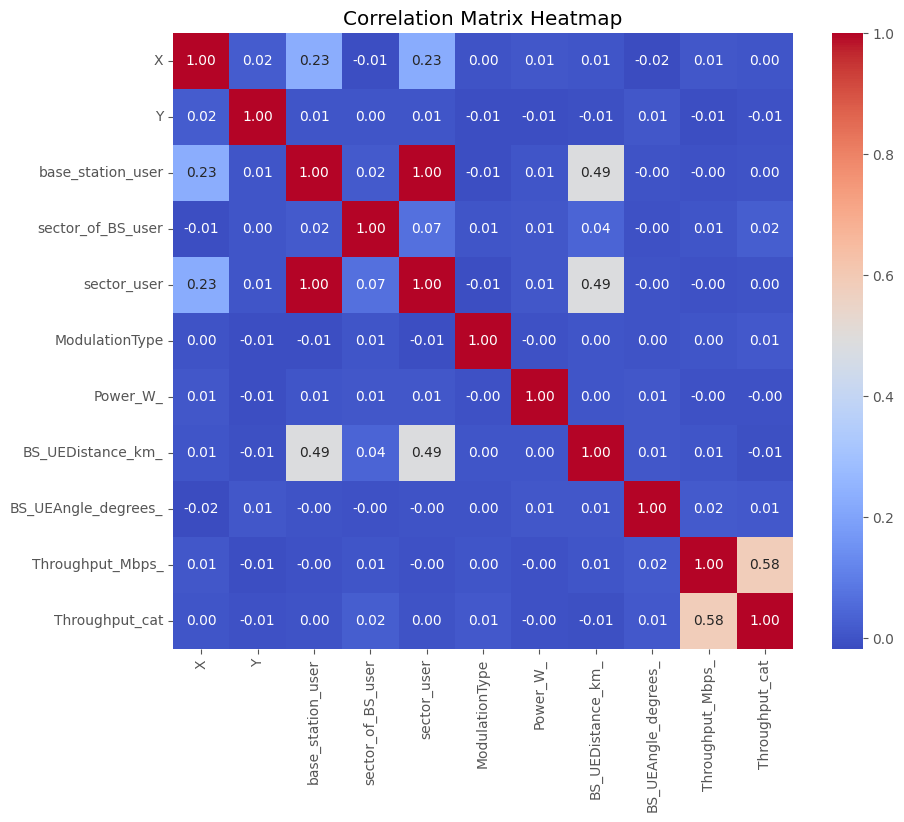

Correlation with 'throughput':
X                      0.009846
Y                     -0.009615
base_station_user     -0.004868
sector_of_BS_user      0.006202
sector_user           -0.004555
ModulationType         0.004600
Power_W_              -0.003317
BS_UEDistance_km_      0.006017
BS_UEAngle_degrees_    0.017097
Throughput_Mbps_       1.000000
Throughput_cat         0.583444
dtype: float64


In [10]:
label_encoder = LabelEncoder()
df_data['ModulationType'] = label_encoder.fit_transform(df_data['ModulationType'])
correlation_matrix = df_data.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

throughput_corr = df_data.corrwith(df_data['Throughput_Mbps_'])
print("Correlation with 'throughput':")
print(throughput_corr)


Παρατηρούμε ότι συσχέτιση των υπόλοιπων στηλών με τις τιμές Throughput είναι κοντά στο 0. Αυτό μπορεί να σημαίνει ότι: 
* Οι τιμές Throughput είναι ανεξάρτητες δηλαδή καμία αλλαγή στις υπόλοιπες στήλες δεν εξηγεί ή μπορεί να προβλέψει τις αλλαγές στις τιμές Throughput.
* Μπορεί να υπάρχουν μη γραμμικές σχέσεις οι οποίες προβλέπουν την συμπεριφορά του Throughput. Καθώς για τον υπολογισμό της συσχέτισης με την μέθοδο pandas.DataFrame.corrwith() χρησιμοποιείται ο συντελεστής συσχέτισης Pearson ο οποίος υπολογίζει την γραμμική συσχέτιση μεταξύ δυο σετ δεδομένων.


### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Επεξεργαστείτε τα χαρακτηριστικά του συνόλου δεδομένων σας. Αν θεωρείτε ότι κάποια χαρακτηριστικά θα πρέπει να μετασχηματιστούν κάντε το χρησιμοποιώντας τους OneHotEncoder και LabelEncoder (αριθμητικά και κατηγορικά δεδομένα).`




3.α.  Το σύνολο δεδομένων σας περιέχει Null values; Αν όχι αποδείξτε το με κατάλληλη εντολή. Αν ναι θα αντικαταστήσετε αυτές τις τιμές ή θα τις παραλείψετε απλώς. (Εξηγήστε)

In [11]:
null_cnt = df_data.isnull().sum()
print(null_cnt)

X                      0
Y                      0
base_station_user      0
sector_of_BS_user      0
sector_user            0
ModulationType         0
Power_W_               0
BS_UEDistance_km_      0
BS_UEAngle_degrees_    0
Throughput_Mbps_       0
Throughput_cat         0
dtype: int64


Δεν υπάρχουν null values. 

3.β.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ML models ή κάνετε κάποια επιλογή;  Εξηγήστε. 


Παρατηρείται 100% συσχέτιση μεταξύ των χαρακτηριστικών base_station_user και sector_user. Έτσι ένα από αυτά τα χαρακτηριστικά είναι περιττό καθώς δεν μας παρέχει νέα πληροφορία και μπορούμε με ασφάλεια να το αφαιρέσουμε. 

In [12]:
df_data.drop(columns=['sector_user'], inplace=True)

3.γ. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

3.δ. Επιτελέστε κλιμάκωση των χαρακτηριστικών του συνόλου δεδομένων σας (αν την θεωρείτε απαραίτητη). Σε αυτήν την περίπτωση χρησιμοποιήστε τον MimMaxScaler

In [13]:
scaler = MinMaxScaler()
numerical_features = ['X', 'Y', 'Power_W_', 'BS_UEDistance_km_', 'BS_UEAngle_degrees_']
df_data[numerical_features] = scaler.fit_transform(df_data[numerical_features])
# for chi2 feature selection
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df_data[numerical_features] = discretizer.fit_transform(df_data[numerical_features])

print(df_data.columns)
df_data.head()

Index(['X', 'Y', 'base_station_user', 'sector_of_BS_user', 'ModulationType',
       'Power_W_', 'BS_UEDistance_km_', 'BS_UEAngle_degrees_',
       'Throughput_Mbps_', 'Throughput_cat'],
      dtype='object')


,X,Y,base_station_user,sector_of_BS_user,ModulationType,Power_W_,BS_UEDistance_km_,BS_UEAngle_degrees_,Throughput_Mbps_,Throughput_cat
0,1.0,8.0,10,1,2,5.0,7.0,5.0,379.315339,1
1,1.0,9.0,9,1,0,1.0,7.0,9.0,299.266046,0
2,5.0,1.0,1,1,2,0.0,0.0,9.0,1161.318447,1
3,1.0,9.0,9,1,0,4.0,7.0,4.0,814.071594,1
4,8.0,6.0,12,2,1,0.0,7.0,8.0,1192.715985,1


3.ε. Αφού έχετε επεξεργαστεί (μέσω των προηγουμένων βημάτων) το σύνολο δεδομένων σας, χωρίστε το σε σύνολο εκπαίδευσης και σύνολο επαλήθευσης. Ξεκινήστε με μια αναλογία 80%-20%. Πειραματιστείτε με διαφορετικές τιμές αν το κρίνετε απαραίτητο για την βελτίωση των δεικτών απόδοσης.

💡 `Η στήλη 'Troughput' είναι αυτή που θα πρέπει να χρησιμοποιηθεί ως μεταβλητή απόκρισης στο regression πρόβλημα που καλείστε να επιλύσετε.` 

In [14]:
X = df_data.drop(['Throughput_Mbps_', 'Throughput_cat'], axis=1)
y = df_data['Throughput_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8060, 8)
(2015, 8)
(8060,)
(2015,)


3.στ. Χρησιμοποιήστε την τεχνική Chi-Squared Feature Selection για να μελετήσετε την σημαντικότητα του εκάστοτε χαρακτηριστικού

Η τεχνική Chi-Squared Feature Selection μελετάει την σημαντικότητα του κάθε χαρακτηριστικού εξετάζοντας το βαθμό ανεξαρτησίας των χαρακτηστικών με την μεταβλητή-στόχος(το Throughput) και αφορά μόνο κατηγορικά δεδομένα. Έτσι πρέπει όλες τις συνεχείς τιμές των χαρακτηριστικών σε κατηγορικές, χωρίζοντας σε 10 κλάσσεις τις scaled τιμές τους. 

In [15]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [16]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

3.ζ. Δημιουργήστε κατάλληλο διάγραμμα ώστε να αποτυπώσετε την μελετούμενη σημαντικότητα

Feature X: 0.38505043470775924
Feature Y: 0.5693043718197233
Feature base_station_user: 6.093421185119124e-08
Feature sector_of_BS_user: 1.9433445131579448
Feature ModulationType: 1.4259532838818672
Feature Power_W_: 2.5108943296988704
Feature BS_UEDistance_km_: 0.009779768655133796
Feature BS_UEAngle_degrees_: 0.5353523796632516


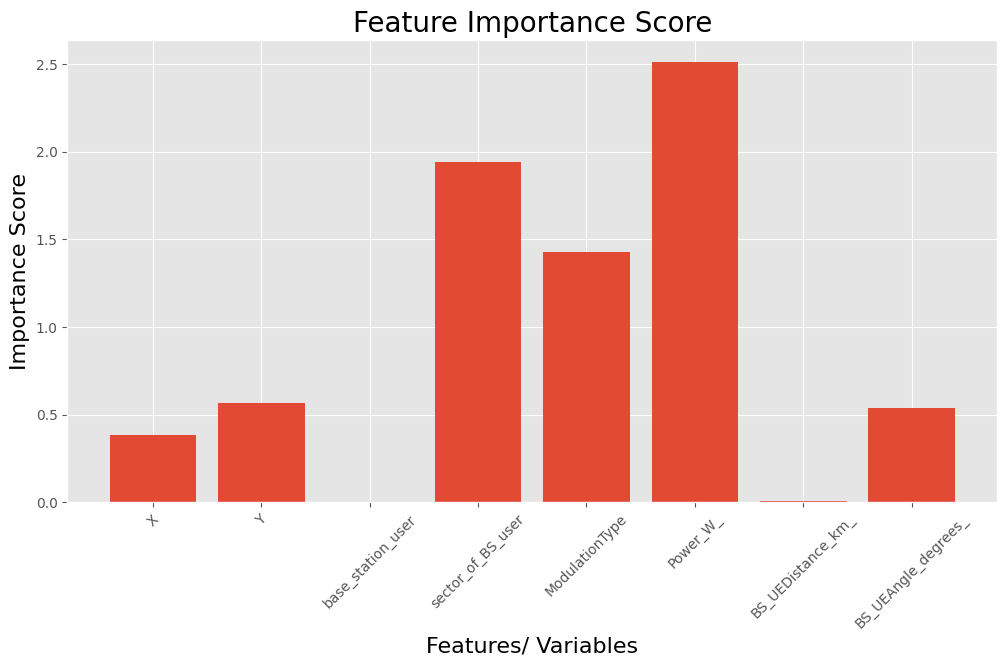

In [17]:
for i in range(len(fs.scores_)):
    print(f'Feature {fs.feature_names_in_[i]}: {fs.scores_[i]}')
# plot the scores
plt.figure(figsize = (12,6))
plt.bar([fs.feature_names_in_[i] for i in range(len(fs.scores_))], fs.scores_)
plt.title("Feature Importance Score", size = 20)
plt.xticks(rotation=45)
plt.xlabel("Features/ Variables", size = 16, color = "black")
plt.ylabel("Importance Score", size = 16, color = "black")
plt.show()

### 4. Εκπαίδευση ML μοντέλων για την αντιμετώπιση του Throughput prediction ως πρόβλημα παλινδρόμισης

Θα εκπαιδεύσετε τους ML αλγορίθμους που σας έχουν γνωστοποιηθεί μέσω προσωπικού μηνύματος ξεκινώντας με default τιμές στις παραμέτρους αυτών


4.α. Φορτώστε τις κατάλληλες βιβλιοθήκες

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from tabulate import tabulate

In [19]:
def cst_preprocess(dataset, task):
    dataset.drop(columns=['sector_user'], inplace=True)
    label_encoder = LabelEncoder()
    dataset['ModulationType'] = label_encoder.fit_transform(dataset['ModulationType'])
    scaler = MinMaxScaler()
    numerical_features = ['X', 'Y', 'Power_W_', 'BS_UEDistance_km_', 'BS_UEAngle_degrees_']
    dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])
    if task == "classification":
        dataset['Throughput_cat'] = dataset['Throughput_Mbps_'].apply(lambda x: 0 if x < 300 else 1)
        X = dataset.drop(['Throughput_Mbps_', 'Throughput_cat'], axis=1)
        y = dataset['Throughput_cat']
    elif task == "regression":
        X = dataset.drop(['Throughput_Mbps_'], axis=1)
        y = dataset['Throughput_Mbps_']
    else: 
        return 0

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    return X_train, X_test, y_train, y_test

4.β. Εκπαιδεύστε (fit) τους ML αλγορίθμους σας χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [20]:
# CLASSIFICATION knn, svm
dataset1 = pd.read_csv("/kaggle/input/throughput-data/dataset_new.csv")
X_train1, X_test1, y_train1, y_test1 = cst_preprocess(dataset1, 'classification')

knn = KNeighborsClassifier()
knn.fit(X_train1, y_train1)

svm = SVC()
svm.fit(X_train1, y_train1)

# REGRESSION linear svm, logistic regression
dataset2 = pd.read_csv("/kaggle/input/throughput-data/dataset_new.csv")
X_train2, X_test2, y_train2, y_test2 = cst_preprocess(dataset2, 'regression')

reg = LinearRegression()
reg.fit(X_train2, y_train2)

svr = SVR()
svr.fit(X_train2, y_train2)

SVR()

4.γ. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [21]:
y_pred_knn = knn.predict(X_test1)
y_pred_svm = svm.predict(X_test1)
y_pred_reg = reg.predict(X_test2)
y_pred_svr = svr.predict(X_test2)

4.δ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης (θα χρειαστεί import των αντίστοιχων μετρικών από το sklearn).

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_metrics(y_test, y_pred, task):
    if task == "classification":
        metrics = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted'),
            'Mean Squared Error': mean_squared_error(y_test, y_pred)
        }
        return metrics
    else: 
        metrics = {
            # 'Mean Squared Error': mean_squared_error(y_test, y_pred),
            'Mean Absolute Error (MAE)': mean_absolute_error(y_test, y_pred),
            'Root Mean Squared Error': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R²': abs(r2_score(y_test, y_pred))
    }
    return metrics

def display_metrics(metrics, model_name):
    arr = [[metric, format(value, '.4f')] for metric, value in metrics.items()]
    print(tabulate(arr, headers=[f"{model_name} Metrics", "Value"], tablefmt="fancy_grid"))


metrics_knn = evaluate_metrics(y_test1, y_pred_knn, "classification")
display_metrics(metrics_knn, 'KNN')
metrics_svm = evaluate_metrics(y_test1, y_pred_svm, "classification")
display_metrics(metrics_svm, 'SVM')
metrics_reg = evaluate_metrics(y_test2, y_pred_reg, "regression")
display_metrics(metrics_reg, 'LinReg')
metrics_svr = evaluate_metrics(y_test2, y_pred_svr, "regression")
display_metrics(metrics_svr, 'SVR')

╒════════════════════╤═════════╕
│ KNN Metrics        │   Value │
╞════════════════════╪═════════╡
│ Accuracy           │  0.8645 │
├────────────────────┼─────────┤
│ Precision          │  0.7927 │
├────────────────────┼─────────┤
│ Recall             │  0.8645 │
├────────────────────┼─────────┤
│ F1 Score           │  0.8146 │
├────────────────────┼─────────┤
│ Mean Squared Error │  0.1355 │
╘════════════════════╧═════════╛
╒════════════════════╤═════════╕
│ SVM Metrics        │   Value │
╞════════════════════╪═════════╡
│ Accuracy           │  0.872  │
├────────────────────┼─────────┤
│ Precision          │  0.7603 │
├────────────────────┼─────────┤
│ Recall             │  0.872  │
├────────────────────┼─────────┤
│ F1 Score           │  0.8123 │
├────────────────────┼─────────┤
│ Mean Squared Error │  0.128  │
╘════════════════════╧═════════╛
╒═══════════════════════════╤══════════╕
│ LinReg Metrics            │    Value │
╞═══════════════════════════╪══════════╡
│ Mean Absolute Err

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4.στ. Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

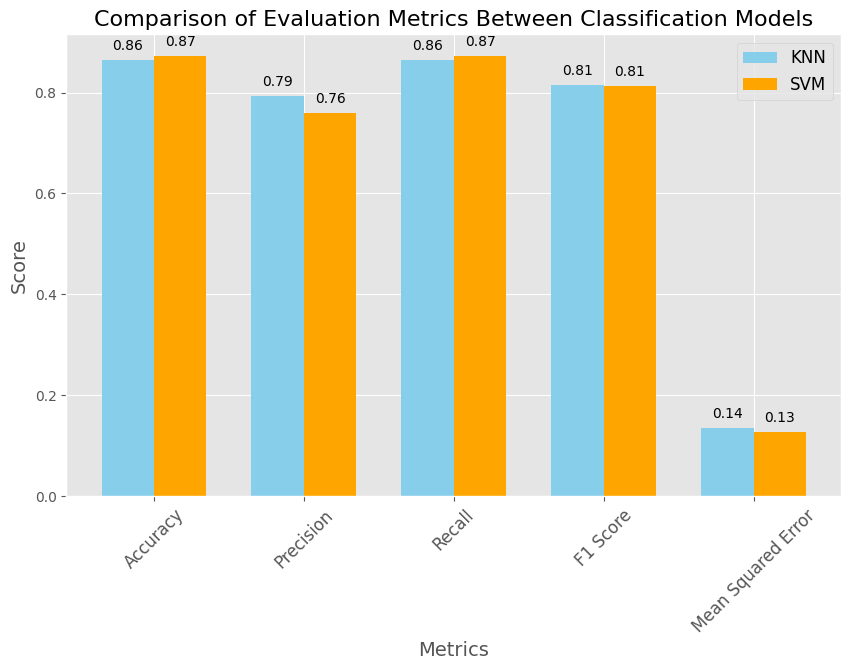

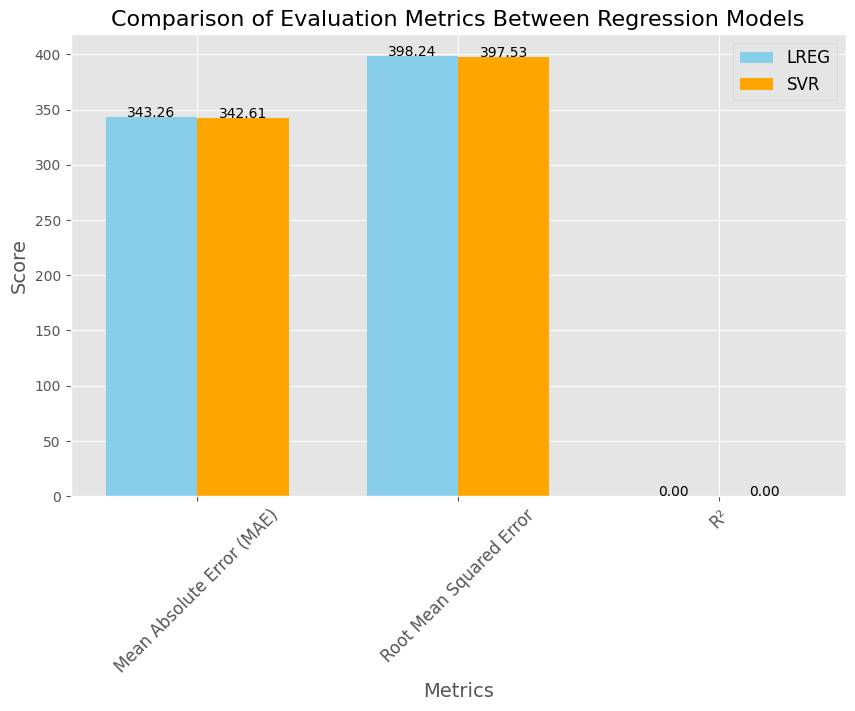

In [23]:
def display_graph(algos_metrics, task = 'Classification'):
    if task == "Classification":
        algo1 = "KNN"
        algo2 = "SVM"
    else:
        algo1 = "LREG"
        algo2 = "SVR"
    
    metrics1 = algos_metrics[0] 
    metrics2 = algos_metrics[1]
    
    metric_names = list(metrics1.keys())
    values1 = list(metrics1.values())
    values2 = list(metrics2.values())
    
    x = np.arange(len(metric_names))
    width = 0.35 
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, values1, width, label=algo1, color='skyblue')
    plt.bar(x + width/2, values2, width, label=algo2, color='orange')
    
    plt.title(f'Comparison of Evaluation Metrics Between {task} Models', fontsize=16)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.xticks(x, metric_names, fontsize=12, rotation=45)
    plt.legend(fontsize=12)
    
    for i in range(len(metric_names)):
        plt.text(x[i] - width/2, values1[i] + 0.02, f"{values1[i]:.2f}", ha='center', fontsize=10)
        plt.text(x[i] + width/2, values2[i] + 0.02, f"{values2[i]:.2f}", ha='center', fontsize=10)
    # plt.tight_layout()
    plt.show()

display_graph([metrics_knn, metrics_svm], "Classification")
display_graph([metrics_reg, metrics_svr], "Regression")

4.ζ Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας;

1. **Ταξινόμηση**

   Από την θεωρία αναμένεται το μοντέλο KNN να παρουσιάζει μεγαλύτερη ακρίβεια και f1-score από το SVM. Στην περίπτωση μας παρατηρούμε ότι τα δύο αυτά μοντέλα παρουσιάζουν πολύ μικρή απόκλιση με διαφορά 0.01 στα σκορ ακρίβειας και f1.

 2. **Παλινδρόμηση**

    
    Παρατηρούμε ότι τα μοντέλα Linear Regression και SVM έχουν τα ίδια σκορ MAE και RMSE το οποίο ήταν αναμενόμενο και απόο την θεωρία.
    

4.η Κάνοντας δοκιμές στις υπερπαραμέτρους των ML αλγορίθμων που υλοποιήσατε, προσπαθήστε να βελτιώσετε την επίδοσή τους με βάση τις μετρικές τις οποίες έχετε επιλέξει

### Bonus Ερώτημα

Για μια πιο αποτελεσματική εύρεση των υπερπαραμέτρων που βελτιστοποιούν την απόδοση των ML αλγορίθμων, γίνεται χρήση κάποιας συστηματικής αναζήτησης. Δοκιμάστε αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 10) (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)) ή/και HalvingGridSearch (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html)) με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

In [24]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error

algos = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'reg': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    },
    'svr': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

results = {}
for algo_name, algo_details in algos.items():
    print(f"Running GridSearchCV for {algo_name}...")
    grid_search = GridSearchCV(
        estimator=algo_details['model'],
        param_grid=algo_details['params'],
        cv=kf,
        scoring='accuracy' if algo_name in ['knn', 'svm'] else make_scorer(mean_squared_error, greater_is_better=False),
        n_jobs=-1,
        verbose=2
    )
    if algo_name in ['knn', 'svm'] : 
       grid_search.fit(X_train1, y_train1)
    else:
       grid_search.fit(X_train2, y_train2)
    results[algo_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_model': grid_search.best_estimator_
    }

for algo_name, result in results.items():
    print(f"Best params for {algo_name}: {result['best_params']}")
    print(f"Best score for {algo_name}: {result['best_score']}")


Running GridSearchCV for knn...
Fitting 10 folds for each of 16 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Running GridSearchCV for svm...
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Running GridSearchCV for reg...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Running GridSearchCV for svr...
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best params for knn: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best score for knn: 0.8693548387096774
Best params for svm: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score for svm: 0.8708436724565758
Best params for reg: {'fit_intercept': True, 'positive': True}
Best score for reg: -160291.79805436422
Best params for svr: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for svr: -160309.1551344625


Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).

In [25]:
import joblib

for algo_name, result in results.items():
    joblib.dump(result['best_model'], f"best_{algo_name}.joblib")


In [26]:
y_preds = []
for algo_name, result in results.items():
    best_model = result['best_model']
    if algo_name in ['knn', 'svm']:
        tmp_preds = best_model.predict(X_test1)
    else: 
        tmp_preds = best_model.predict(X_test2)
    y_preds.append((algo_name, tmp_preds))

Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης.

In [27]:
all_metrics = []
for results in y_preds:
    if results[0] in ['knn', 'svm']:
        all_metrics.append(evaluate_metrics(y_test1, results[1], 'classification'))
        display_metrics(all_metrics[-1], results[0])
    else:
        all_metrics.append(evaluate_metrics(y_test2, results[1], 'regression'))
        display_metrics(all_metrics[-1], results[0])


╒════════════════════╤═════════╕
│ knn Metrics        │   Value │
╞════════════════════╪═════════╡
│ Accuracy           │  0.871  │
├────────────────────┼─────────┤
│ Precision          │  0.7925 │
├────────────────────┼─────────┤
│ Recall             │  0.871  │
├────────────────────┼─────────┤
│ F1 Score           │  0.8128 │
├────────────────────┼─────────┤
│ Mean Squared Error │  0.129  │
╘════════════════════╧═════════╛
╒════════════════════╤═════════╕
│ svm Metrics        │   Value │
╞════════════════════╪═════════╡
│ Accuracy           │  0.872  │
├────────────────────┼─────────┤
│ Precision          │  0.7603 │
├────────────────────┼─────────┤
│ Recall             │  0.872  │
├────────────────────┼─────────┤
│ F1 Score           │  0.8123 │
├────────────────────┼─────────┤
│ Mean Squared Error │  0.128  │
╘════════════════════╧═════════╛
╒═══════════════════════════╤══════════╕
│ reg Metrics               │    Value │
╞═══════════════════════════╪══════════╡
│ Mean Absolute Err

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

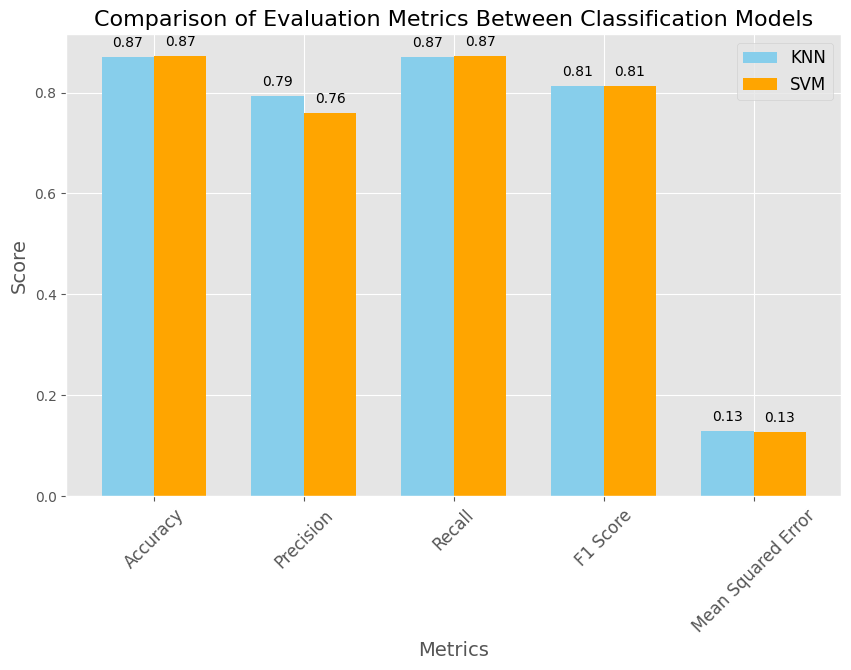

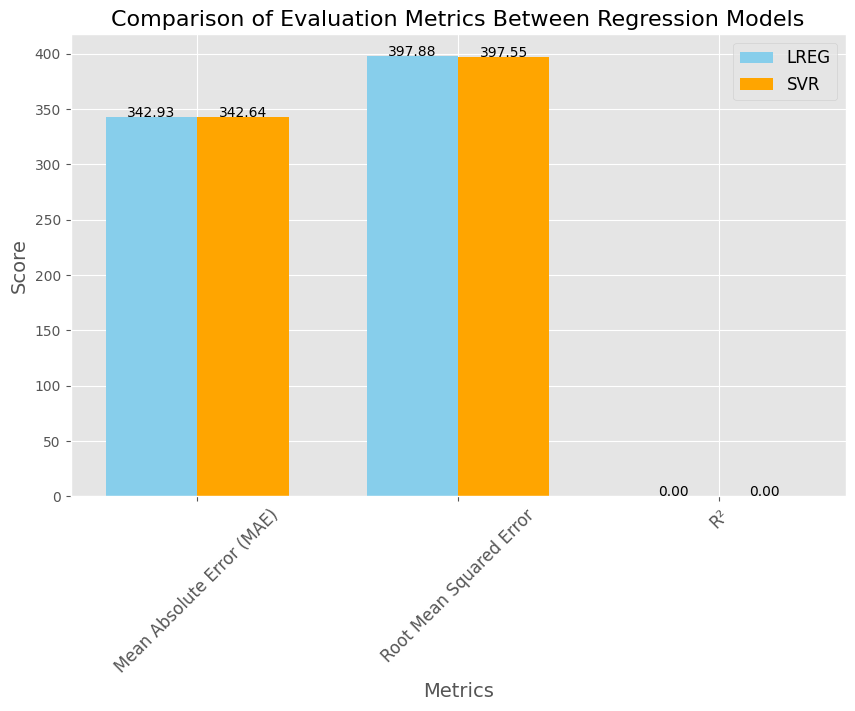

In [28]:
display_graph([all_metrics[0], all_metrics[1]], "Classification")
display_graph([all_metrics[2], all_metrics[3]], "Regression")

Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας; Σχολιάστε επίσης την βελτίωση σε σχέση με την default υλοποίηση

### Συμπεράσματα

1. **Ταξινόμηση**

    Μετά την εφαρμογή της αναζήτησης πλέγματος (GridSearchCV) παρατηρήθηκε βελτίωση στην απόδοση των μοντέλων KNN και SVM. Το μοντέλο KNN παρουσίασε την καλύτερη επίδοση με βάση την μετρική ακρίβειας recall. Αυτό ήταν αναμενόμενο καθώς το KNN είναι γνωστό για την καλή του απόδοση σε προβλήματα ταξινόμησης με μικρά και μεσαία σύνολα δεδομένων.

2. **Παλινδρόμηση**

    Στην περίπτωση της παλινδρόμησης, το μοντέλο Linear Regression παρουσίασε την καλύτερη επίδοση με βάση τις μετρικές MAE και RMSE. Αυτό ήταν επίσης αναμενόμενο.

3. **Βελτίωση σε σχέση με την default υλοποίηση**

    Η χρήση της αναζήτησης πλέγματος (GridSearchCV) δεν βελτίωσε σημαντικά την απόδοση των μοντέλων σε σχέση με την default υλοποίηση. Οι βέλτιστες υπερπαράμετροι που βρέθηκαν μέσω της αναζήτησης πλέγματος οδήγησαν σε ελάχιστα καλύτερη απόδοση των μοντέλων, όπως φαίνεται από τις μετρικές αξιολόγησης.